## ON THE FUZE DATA AREA
### Technical Test Phase II: Data Engineer & Analyst by David Peláez Burbano
This is the data pipeline of the contacts found in the Hubspot account by the access token key:
'pat-na1-3c7b0af9-bb66-40e7-a256-ce4c5eb27e81'

For the extraction, transformation and loading of the data I used a library called "mylibrary" below I show the introduction of this library:


In [1]:
from mylibrary import intro
intro.about()

Welcome Evaluator
My name is mylibrary and I can help you to :
1. Extract information of contacts by a hubspot token key
2. Fix this information in the case of unknown countrys, incomplete phone code numbers or/and finding emails addresses.
3. Loading this fixed information in a Hubspot account


## Data Extraction

Inside mylibrary there is a folder called "Extraction_functions" with the module "Contact_collection" and the function "collect_contacts"

The properties to be collected for each contact are: *“raw_email”, “country”,
“phone”, “technical_test___create_date”, “industry”, “address” and
“hs_object_id”*

In [2]:
import pandas as pd
from mylibrary.Extraction_Functions import Contact_collection as Concol

#These function need the access token key and return all the properties of the contacts in a list of dictionaries
data=Concol.collect_contacts('pat-na1-3c7b0af9-bb66-40e7-a256-ce4c5eb27e81')

# Here we use pandas for a better management of the data
df = pd.DataFrame(data)

# Reorder the columns
columns_order = ["email", "country", "phone", "create_date", "industry", "address", "hs_object_id"]
df = df[columns_order]

print(df.to_string(index=False))

# Results save in a .csv format
df.to_csv('data.csv', index=False)

                                                          email       country         phone              create_date             industry                      address hs_object_id
                Zoe <zoe_owen450104633@acrit.org> Contact Info.     Waterford 0-774-386-624 2023-05-15T02:39:02.002Z     Poultry and fish         Blackpool  Rue, 6576       416102
         Zara <zara_rodwell1398442854@nickia.com> Contact Info.       Ireland 6-777-367-783 2023-05-15T02:39:02.003Z Fruit and vegetables      Parkfield  Avenue, 5340       413403
         Zara <zara_freeburn1593147546@gmail.com> Contact Info.       Ireland 5-618-556-540 2023-05-15T02:39:02.003Z              Milling          Abourne   Lane, 876       417951
        Winnie <winnie_walter538064895@sheye.org> Contact Info.        Dublin 1-161-604-327 2023-05-15T02:39:02.003Z       Dairy products Chester      Crossroad, 7070       419852
              Zoe <zoe_owen1652446013@bungar.biz> Contact Info.        Dublin 5-645-416-200 2023-05-

## Data Transformation
Inside mylibrary we also have a folder called "Transformation_functions" there are 4 modules in this folder with a specific function in order to fix the extracted data.

In [3]:
from mylibrary.Transformation_Functions import Country_Recognition, Fix_Phone_Numbers, Found_Emails, duplicates_management

# Here we replace the country keys with the country found and add a new key "city" to be filled with a city in case there is one. 

for contact in data:
    country=contact["country"]
    count,city=Country_Recognition.get_city_info(country)
    contact["country"]=count
    contact["city"]=city
print(data)

zoe_owen450104633@acrit.org
[{'email': 'Zoe <zoe_owen450104633@acrit.org> Contact Info.', 'country': 'United States', 'phone': '0-774-386-624', 'create_date': '2023-05-15T02:39:02.002Z', 'industry': 'Poultry and fish', 'address': 'Blackpool  Rue, 6576', 'hs_object_id': '416102', 'city': 'Waterford'}, {'email': 'Zara <zara_rodwell1398442854@nickia.com> Contact Info.', 'country': 'Ireland', 'phone': '6-777-367-783', 'create_date': '2023-05-15T02:39:02.003Z', 'industry': 'Fruit and vegetables', 'address': 'Parkfield  Avenue, 5340', 'hs_object_id': '413403', 'city': ''}, {'email': 'Zara <zara_freeburn1593147546@gmail.com> Contact Info.', 'country': 'Ireland', 'phone': '5-618-556-540', 'create_date': '2023-05-15T02:39:02.003Z', 'industry': 'Milling', 'address': 'Abourne   Lane, 876', 'hs_object_id': '417951', 'city': ''}, {'email': 'Winnie <winnie_walter538064895@sheye.org> Contact Info.', 'country': 'Ireland', 'phone': '1-161-604-327', 'create_date': '2023-05-15T02:39:02.003Z', 'industry':

In [4]:
# We fixed the emails by leaving just the example@example.com
for contact in data:
    email=contact["email"]
    email_add=Found_Emails.email_extracting(email)
    print(email_add)
    contact["email"]=email_add


zoe_owen450104633@acrit.org
zara_rodwell1398442854@nickia.com
zara_freeburn1593147546@gmail.com
winnie_walter538064895@sheye.org
zoe_owen1652446013@bungar.biz
zara_oldfield587137840@ubusive.com
zara_freeburn2028884073@gembat.biz
zara_rodwell1270511699@zorer.org
zara_oldfield769606638@atink.com
willow_morris1105172480@qater.org
willow_nash743964098@twace.org
willow_nash1165890703@fuliss.net
willow_morris1547026985@tonsy.org
winnie_bristow1379132537@sheye.org
willow_jones456638849@atink.com
winnie_walter1068546463@naiker.biz
winnie_bristow1103281781@infotech44.tech
william_wooldridge878113695@vetan.org
william_wilkinson2025879958@nanoff.biz
william_tate750215510@famism.biz
william_wooldridge512204749@bauros.biz
william_wilkinson498036762@cispeto.com
william_webster42710007@iatim.tech
william_webster1737049619@fuliss.net
william_wilkinson881615937@dionrab.com
willow_jones1961334962@nanoff.biz
william_neville1250658506@ovock.tech
william_nobbs468549179@sheye.org
william_tate2145282000@baur

In [5]:
# Then we fixes de phone number to a format that includes the phone code of the country: (+NNN) NNNN NNNNNN
fixed_data=Fix_Phone_Numbers.fix_number(data)

df1=pd.DataFrame(fixed_data)

print(df1.to_string(index=False))

df1.to_csv('fixed_data.csv', index=False)


                                   email        country              phone              create_date             industry                      address hs_object_id          city
             zoe_owen450104633@acrit.org  United States    (+1) 774 386624 2023-05-15T02:39:02.002Z     Poultry and fish         Blackpool  Rue, 6576       416102     Waterford
       zara_rodwell1398442854@nickia.com        Ireland (+353) 6777 367783 2023-05-15T02:39:02.003Z Fruit and vegetables      Parkfield  Avenue, 5340       413403              
       zara_freeburn1593147546@gmail.com        Ireland (+353) 5618 556540 2023-05-15T02:39:02.003Z              Milling          Abourne   Lane, 876       417951              
        winnie_walter538064895@sheye.org        Ireland (+353) 1161 604327 2023-05-15T02:39:02.003Z       Dairy products Chester      Crossroad, 7070       419852        Dublin
           zoe_owen1652446013@bungar.biz        Ireland (+353) 5645 416200 2023-05-15T02:39:02.003Z                

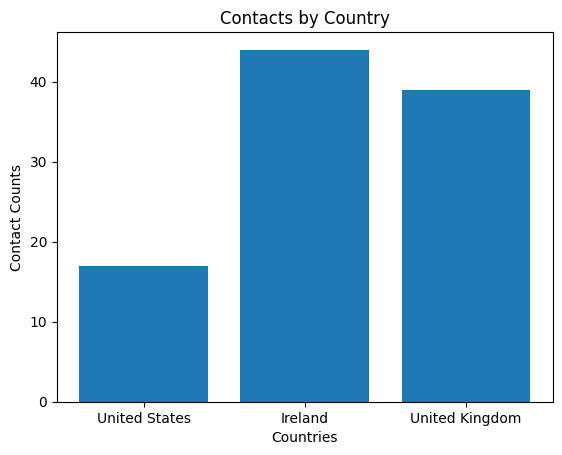

In [6]:
# For a better understanding of the data here we have some graphics that tell us how many contries are registered in contacts
import matplotlib.pyplot as plt
# Count the contacts by country
counts = {}
for item in fixed_data:
    country = item["country"]
    if country in counts:
        counts[country] += 1
    else:
        counts[country] = 1

# Extract the countries and counts from the dictionary
countries = list(counts.keys())
contact_counts = list(counts.values())

# Plotting the bar chart
plt.bar(countries, contact_counts)
plt.xlabel("Countries")
plt.ylabel("Contact Counts")
plt.title("Contacts by Country")

# Display the plot
plt.show()

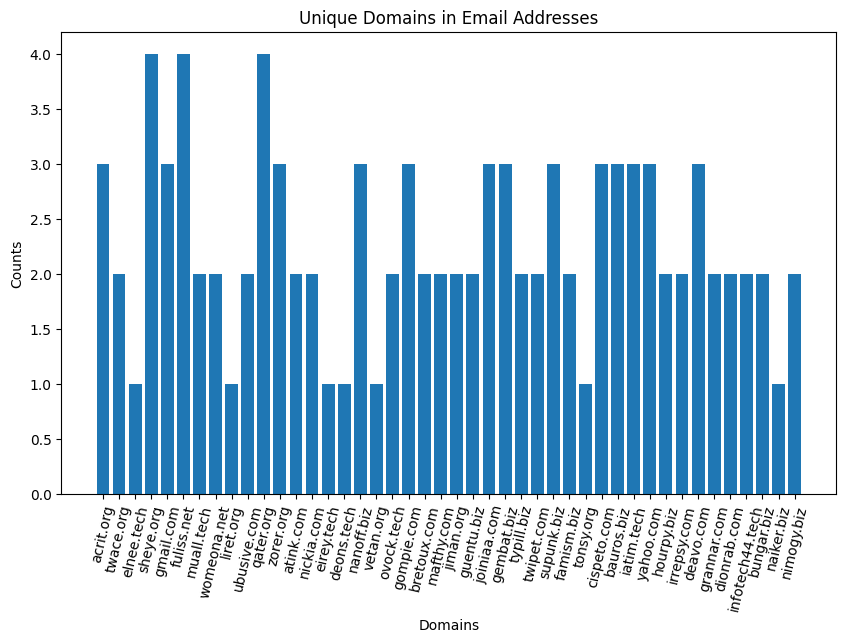

In [7]:
# Let's see how many unique emails domains there are

domains = set()  # Set to store unique domains

# Extract domains from email addresses
for item in fixed_data:
    email = item["email"]
    domain = email.split("@")[1]  # Extract domain after '@'
    domains.add(domain)

# Count the occurrences of each domain
domain_counts = {}
for domain in domains:
    count = sum(email.endswith(domain) for email in [item["email"] for item in fixed_data])
    domain_counts[domain] = count

# Prepare data for plotting
x_values = list(domain_counts.keys())
y_values = list(domain_counts.values())

plt.figure(figsize=(10, 6))

# Plotting the bar chart
plt.bar(x_values, y_values)
plt.xlabel("Domains")
plt.ylabel("Counts")
plt.title("Unique Domains in Email Addresses")

# Rotate x-axis labels for better readability
plt.xticks(rotation=77)

# Display the plot
plt.show()

In [8]:
# Last step before we load the data is to make sure there are no duplicates

Data_to_load=duplicates_management.merge_records(fixed_data)

df2=pd.DataFrame(Data_to_load)

print(df2.to_string(index=False))

df2.to_csv('Data_to_load.csv', index=False)

                                   email        country              phone              create_date              industry                      address hs_object_id          city
             zoe_owen450104633@acrit.org  United States    (+1) 774 386624 2023-05-15T02:39:02.002Z     ;Poultry and fish         Blackpool  Rue, 6576       416102     Waterford
       zara_rodwell1398442854@nickia.com        Ireland (+353) 6777 367783 2023-05-15T02:39:02.003Z ;Fruit and vegetables      Parkfield  Avenue, 5340       413403              
       zara_freeburn1593147546@gmail.com        Ireland (+353) 5618 556540 2023-05-15T02:39:02.003Z              ;Milling          Abourne   Lane, 876       417951              
        winnie_walter538064895@sheye.org        Ireland (+353) 1161 604327 2023-05-15T02:39:02.003Z       ;Dairy products Chester      Crossroad, 7070       419852        Dublin
           zoe_owen1652446013@bungar.biz        Ireland (+353) 5645 416200 2023-05-15T02:39:02.003Z           


## Data Loading
Inside mylibrary we also have a folder called "Load_functions" there is module in this folder with a specific function in order to update the extracted and transformed data.

In [9]:
from mylibrary.Load_Functions import Saving_Contacts
#Finaly we store the data in a Hubspot account by the access token key: "pat-na1-566cab7f-11cf-42e8-8929-f287ee426d8b"
Saving_Contacts.store_contacts_in_hubspot(Data_to_load)

Contact with email 'zoe_owen450104633@acrit.org' has been stored in HubSpot.
Contact with email 'zara_rodwell1398442854@nickia.com' has been stored in HubSpot.
Contact with email 'zara_freeburn1593147546@gmail.com' has been stored in HubSpot.
Contact with email 'winnie_walter538064895@sheye.org' has been stored in HubSpot.
Contact with email 'zoe_owen1652446013@bungar.biz' has been stored in HubSpot.
Contact with email 'zara_oldfield587137840@ubusive.com' has been stored in HubSpot.
Contact with email 'zara_freeburn2028884073@gembat.biz' has been stored in HubSpot.
Contact with email 'zara_rodwell1270511699@zorer.org' has been stored in HubSpot.
Contact with email 'zara_oldfield769606638@atink.com' has been stored in HubSpot.
Contact with email 'willow_morris1105172480@qater.org' has been stored in HubSpot.
Contact with email 'willow_nash743964098@twace.org' has been stored in HubSpot.
Contact with email 'willow_nash1165890703@fuliss.net' has been stored in HubSpot.
Contact with email 